<a href="https://colab.research.google.com/github/DheanAR/Pemrograman_Python_Neural-Network/blob/main/TUGAS_PRESENSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [38]:
ls

 B53B5136-5920-438D-A89E-D059CF9D56F7.png
'Colab Notebooks'/
 dataset/
'DBZ Kakarot'/
 downloadMandiri1606534280268.jpg
 IMG_20200505_115816.jpg
 IMG_20200607_113514.jpg
 JKT48/
'NFS Heat'/
'OTONG DRIVE'/
 Screenshot_105.png
 Screenshot_139.png
 Screenshot_172.png
 Screenshot_2020-08-11-19-33-30-631_com.mobile.legends.jpg
 Screenshot_2020-08-11-19-36-11-610_com.mobile.legends.jpg
 Screenshot_2020-08-11-19-46-18-397_com.mobile.legends.jpg
 Screenshot_2020-08-25-18-58-01-343_us.zoom.videomeetings.jpg
 Screenshot_264.png
 Screenshot_38.png
'[ToraBatch.com] Dragon Ball Super 001 - 025.rar'
 TT-43-01_6_DBANK.rar
'WhatsApp Image 2020-10-23 at 8.37.19 PM.jpeg'
'WhatsApp Image 2020-10-23 at 8.37.53 PM.jpeg'
 WQIS8412.MP4


In [39]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [40]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [41]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [42]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [43]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [44]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [45]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.12, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1238, 240, 240, 3)
(169, 240, 240, 3)


In [79]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(9, (4,4), activation='relu', input_shape=(240,240,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(18, (4,4), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 237, 237, 9)       441       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 118, 118, 9)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 115, 115, 18)      2610      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 57, 57, 18)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 58482)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               5848300   
_________________________________________________________________
dense_19 (Dense)             (None, 12)              

In [80]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [81]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [82]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [83]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
39/39 [==============================] - 46s 1s/step - loss: 3.2974 - accuracy: 0.1195 - val_loss: 2.3373 - val_accuracy: 0.1953
Epoch 2/25
39/39 [==============================] - 46s 1s/step - loss: 1.9841 - accuracy: 0.3611 - val_loss: 1.8868 - val_accuracy: 0.4024
Epoch 3/25
39/39 [==============================] - 46s 1s/step - loss: 1.2389 - accuracy: 0.5897 - val_loss: 1.7576 - val_accuracy: 0.4675
Epoch 4/25
39/39 [==============================] - 46s 1s/step - loss: 0.8201 - accuracy: 0.7302 - val_loss: 1.6771 - val_accuracy: 0.4734
Epoch 5/25
39/39 [==============================] - 46s 1s/step - loss: 0.4471 - accuracy: 0.8570 - val_loss: 1.4372 - val_accuracy: 0.5799
Epoch 6/25
39/39 [==============================] - 45s 1s/step - loss: 0.2566 - accuracy: 0.9241 - val_loss: 1.5023 - val_accuracy: 0.5503
Epoch 7/25
39/39 [==============================] - 46s 1s/step - loss: 0.1639 - accuracy: 0.9612 - val_loss: 1.5279 - val_accuracy: 0.5385
Epoch 8/25
39/39 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


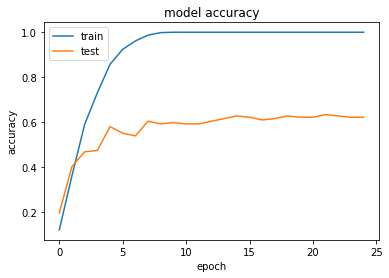

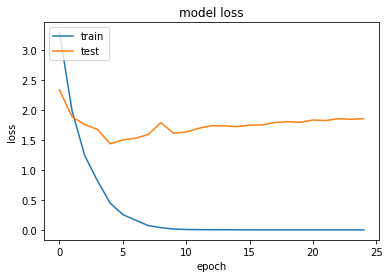

In [84]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [86]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.75      0.79      0.77        19
      GMB_02       0.55      0.67      0.60         9
      GMB_03       0.71      0.91      0.80        11
      GMB_04       0.61      0.88      0.72        16
      GMB_05       0.63      0.67      0.65        18
      GMB_06       0.30      0.21      0.25        14
      GMB_07       0.73      0.42      0.53        19
      GMB_08       0.62      0.67      0.65        15
      GMB_09       0.44      1.00      0.62         8
      GMB_10       0.60      0.50      0.55        12
      GMB_11       1.00      0.29      0.45        17
      nonGMB       0.67      0.73      0.70        11

    accuracy                           0.62       169
   macro avg       0.63      0.64      0.61       169
weighted avg       0.65      0.62      0.60       169



In [90]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

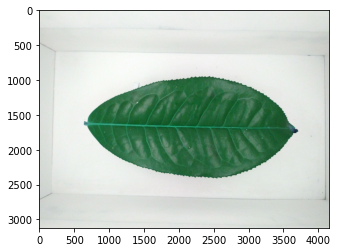

In [91]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [92]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [93]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [94]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.15880501 0.41145912 0.42973584]]
['GMB_03']
